In [ ]:
from selenium import webdriver
import time
import csv
import re


# 搜索商品，获取商品页码
def search_product(key_word):
    # 定位输入框,定位搜索框中，查看代码发现id=q
    browser.find_element_by_id("q").send_keys(key_word)
# 定义点击按钮，并点击,"搜索"按钮的类名是btn-search
    browser.find_element_by_class_name('btn-search').click()
# 最大化窗口：为了方便我们扫码
    browser.maximize_window()
# 等待15秒，给足时间我们扫码
    time.sleep(15)
# 定位这个“页码”，获取“共100页这个文本”
    page_info = browser.find_element_by_xpath('//div[@class="total"]').text
# 需要注意的是：findall()返回的是一个列表，虽然此时只有一个元素它也是一个列表。
    # 返回总页数是”共100页“ 用正则取数字100，\d是匹配一个数字\d+匹配多个数字
    page = re.findall("(\d+)", page_info)[0]
    return page



# 获取数据
def get_data():
# 通过页面分析发现：所有的信息都在items节点下
    items = browser.find_elements_by_xpath('//div[@class="items"]/div[@class="item J_MouserOnverReq  "]')
    for item in items:
        # 参数信息
        pro_desc = item.find_element_by_xpath('.//div[@class="row row-2 title"]/a').text
        # 价格
        pro_price = item.find_element_by_xpath('.//strong').text
        # 付款人数
        buy_num = item.find_element_by_xpath('.//div[@class="deal-cnt"]').text
        # 旗舰店
        shop = item.find_element_by_xpath('.//div[@class="shop"]/a').text
        # 发货地
        address = item.find_element_by_xpath('.//div[@class="location"]').text
        # print(pro_desc, pro_price, buy_num, shop, address)
        with open('{}.csv'.format(key_word), mode='a', newline='', encoding='utf-8-sig')as f:
            csv_writer = csv.writer(f, delimiter=',')
            csv_writer.writerow([pro_desc, pro_price, buy_num, shop, address])

            
def main():
    browser.get('https://www.taobao.com/')
    page = search_product(key_word)
    print(page)
    get_data()

    
    page_num =1
    while int(page) != page_num:
        print("*" *100)
        print("正在爬取第{}页".format(page_num +1))
        browser.get('https://s.taobao.com/search?q={}&s={}'.format(key_word, page_num *44))
        browser.implicitly_wait(15)
        get_data()
        page_num +=1
        print("数据爬取完毕！")

if __name__ =='__main__':
    
    key_word ="粽子"
    browser = webdriver.Chrome()
    main()



100
****************************************************************************************************
正在爬取第2页
数据爬取完毕！
****************************************************************************************************
正在爬取第3页
数据爬取完毕！
****************************************************************************************************
正在爬取第4页
数据爬取完毕！
****************************************************************************************************
正在爬取第5页
数据爬取完毕！
****************************************************************************************************
正在爬取第6页
数据爬取完毕！
****************************************************************************************************
正在爬取第7页
数据爬取完毕！
****************************************************************************************************
正在爬取第8页
数据爬取完毕！
****************************************************************************************************
正在爬取第9页
数据爬取完毕！
************************************************************

https://tp.wjx.top/wjx/join/completemobile2.aspx?activityid=91423735&joinactivity=107331453120&sojumpindex=6993&anst=nQN5chycOpyAoZ2%2bB0SeyYPbroKi%2fktA&tpii=7

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

In [243]:
df = pd.read_csv('./obj.csv')
#df

In [244]:
in_list = [int(i) for i in np.linspace(0,len(dfzs)-1,8)]
ina_list = dfzs.index[in_list]
inb_list = [time.strftime("%H:%M:%S", time.localtime(t)) for t in ina_list]

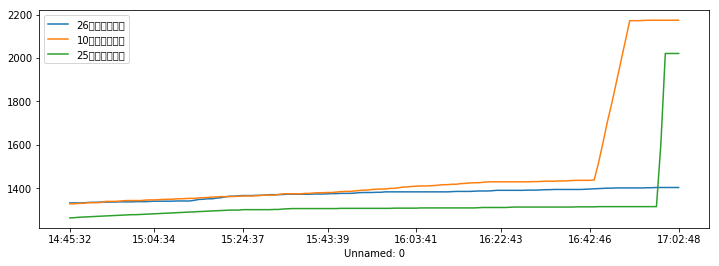

In [245]:
dfzs = df.iloc[:,1:4]
dfzs.index = df.iloc[:,0]

in_list = [int(i) for i in np.linspace(0,len(dfzs)-1,8)]
ina_list = dfzs.index[in_list]
inb_list = [time.strftime("%H:%M:%S", time.localtime(t)) for t in ina_list]
dfzs.plot(figsize=(12,4))
plt.xticks(ina_list,inb_list);

In [235]:
dfzs_r = dfzs.copy()

In [236]:
dfzs_r.index = [time.strftime("%H:%M:%S", time.localtime(t)) for t in dfzs.index]

In [237]:
dfzs_r

,26组马朝红家庭,10组欧远明家庭,25组卢桂珍家庭
14:45:32,1333.0,1329.0,1264.0
14:46:32,1333.0,1329.0,1265.0
14:47:32,1333.0,1331.0,1267.0
14:48:32,1333.0,1331.0,1268.0
14:49:32,1335.0,1334.0,1269.0
14:50:32,1336.0,1334.0,1270.0
14:51:32,1336.0,1334.0,1271.0
14:52:32,1337.0,1335.0,1272.0
14:53:33,1337.0,1340.0,1273.0
14:54:33,1337.0,1340.0,1274.0


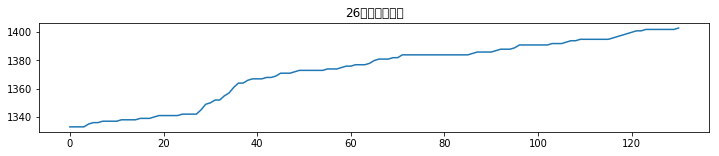

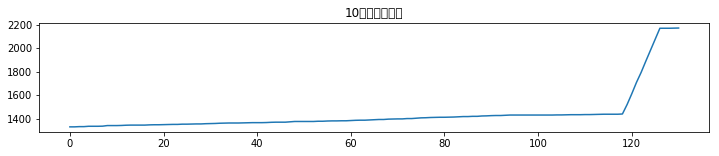

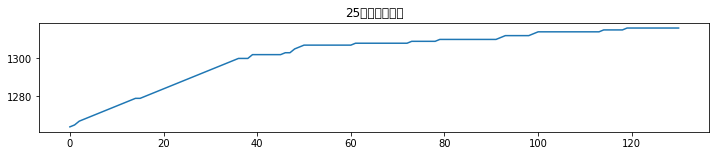

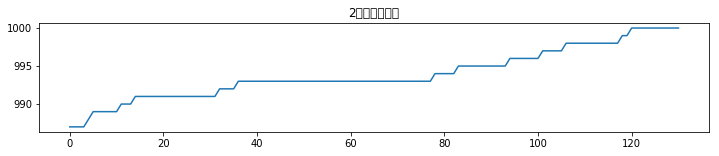

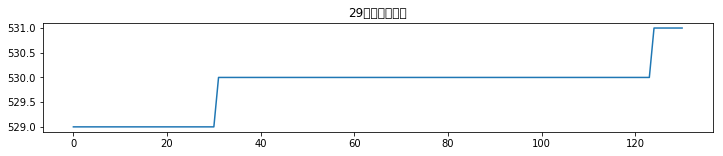

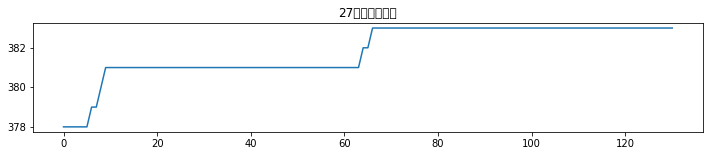

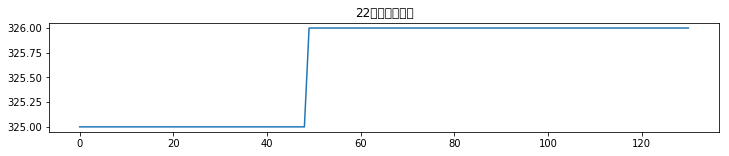

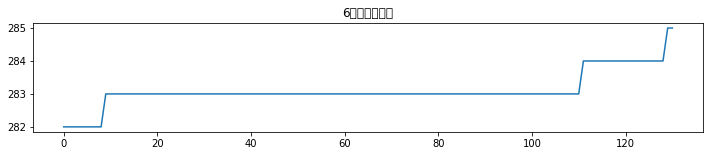

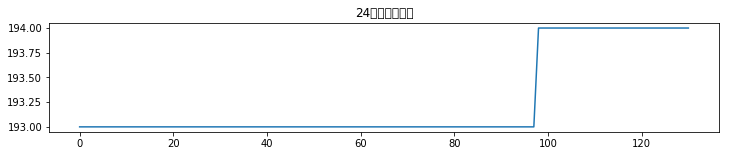

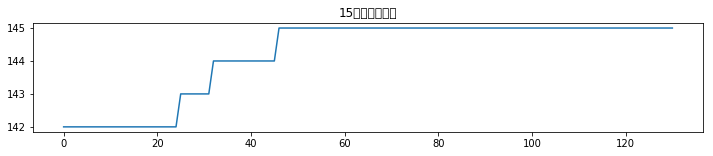

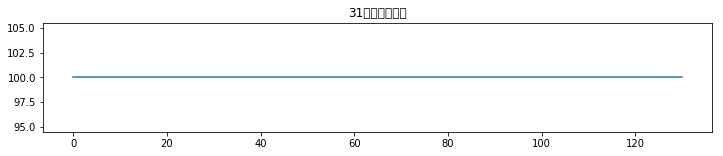

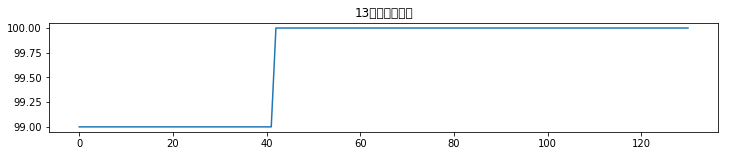

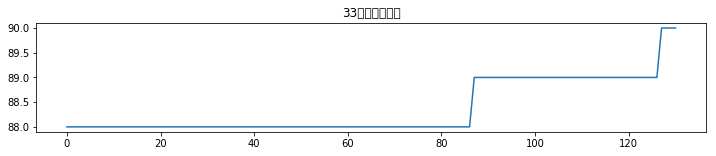

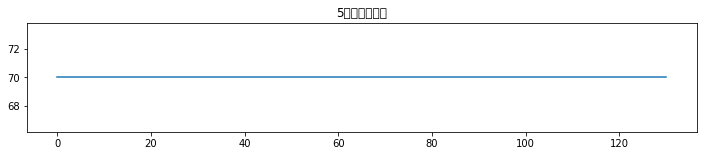

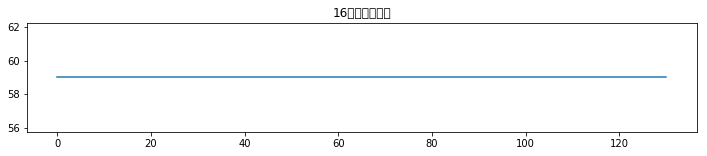

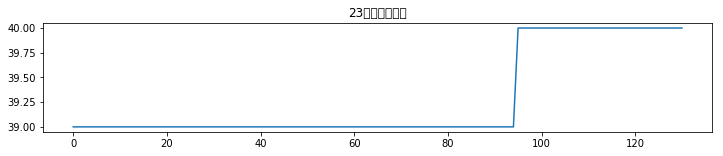

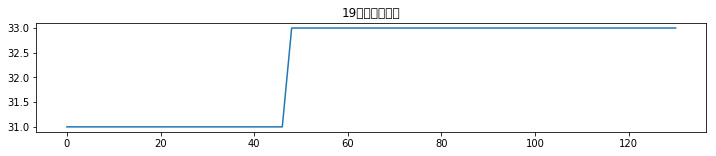

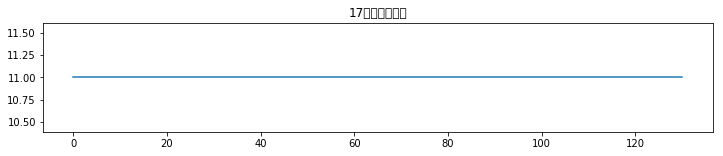

In [238]:
dfzs = df.iloc[:,1:]
for i in dfzs.columns:
    #print(i)
    dfthis = dfzs.loc[:,i]
    plt.figure(figsize=(12,2))
    dfthis.plot()
    plt.title(i)
    #plt.ylim(0,1500)

In [42]:
i

'17组叶道凯家庭'

In [31]:
dfzs

,26组马朝红家庭,10组欧远明家庭,25组卢桂珍家庭,2组李生林家庭,29组吴世君家庭,27组许汝俊家庭,22组韩学荣家庭,6组邱荣吉家庭,24组姜辉武家庭,15组赵克凤家庭,31组曾德宽家庭,13组邹品忠家庭,33组黎顺先家庭,5组柳荣海家庭,16组赵祖龙家庭,23组陈嗣谷家庭,19组廖传秀家庭,17组叶道凯家庭
0,1333.0,1329.0,1264.0,987.0,529.0,378.0,325.0,282.0,193.0,142.0,100.0,99.0,88.0,70.0,59.0,39.0,31.0,11.0
1,1333.0,1329.0,1265.0,987.0,529.0,378.0,325.0,282.0,193.0,142.0,100.0,99.0,88.0,70.0,59.0,39.0,31.0,11.0
2,1333.0,1331.0,1267.0,987.0,529.0,378.0,325.0,282.0,193.0,142.0,100.0,99.0,88.0,70.0,59.0,39.0,31.0,11.0
3,1333.0,1331.0,1268.0,987.0,529.0,378.0,325.0,282.0,193.0,142.0,100.0,99.0,88.0,70.0,59.0,39.0,31.0,11.0
4,1335.0,1334.0,1269.0,988.0,529.0,378.0,325.0,282.0,193.0,142.0,100.0,99.0,88.0,70.0,59.0,39.0,31.0,11.0
5,1336.0,1334.0,1270.0,989.0,529.0,378.0,325.0,282.0,193.0,142.0,100.0,99.0,88.0,70.0,59.0,39.0,31.0,11.0
6,1336.0,1334.0,1271.0,989.0,529.0,379.0,325.0,282.0,193.0,142.0,100.0,99.0,88.0,70.0,59.0,39.0,31.0,11.0
7,1337.0,1335.0,1272.0,989.0,529.0,379.0,325.0,282.0,193.0,142.0,100.0,99.0,88.0,70.0,59.0,39.0,31.0,11.0
8,1337.0,1340.0,1273.0,989.0,529.0,380.0,325.0,282.0,193.0,142.0,100.0,99.0,88.0,70.0,59.0,39.0,31.0,11.0
9,1337.0,1340.0,1274.0,989.0,529.0,381.0,325.0,283.0,193.0,142.0,100.0,99.0,88.0,70.0,59.0,39.0,31.0,11.0
